In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_excel('Internship.xlsx').to_csv('Internship.csv',index=False)

In [5]:
data=pd.read_csv('Internship.csv')
data.head()

,Well ID,S.No,STATE,DISTRICT,BLOCK,LOCATION,LATITUDE,LONGITUDE,Year,pH,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
0,W113126092431802,1,A&N Islands,South Andaman,PORT BLAIR,Kodiaghat,11.54500,92.74583,2021,7.74,...,NaN,175.0,34.0,22.0,10.0,0.0,0.84,NaN,206.0,4.8
1,W113616092411001,2,A&N Islands,South Andaman,PORT BLAIR,Sippighat,11.60250,92.73000,2021,7.53,...,NaN,250.0,52.0,29.0,51.0,1.0,0.28,NaN,381.0,6.4
2,W113640092443301,3,A&N Islands,South Andaman,PORT BLAIR,Brichganj,11.62083,92.73028,2021,7.50,...,NaN,125.0,4.0,28.0,10.0,1.0,0.46,NaN,151.0,BDL
3,W114421092422801,4,A&N Islands,South Andaman,FERRARGUNJ,Wimberleyganj,11.73250,92.70861,2021,7.60,...,NaN,135.0,26.0,17.0,15.0,2.0,0.37,NaN,198.0,0.4
4,W113955092391801,5,A&N Islands,South Andaman,FERRARGUNJ,Ograbraj,11.66361,92.65806,2021,7.82,...,NaN,465.0,56.0,79.0,336.0,18.0,0.95,NaN,1424.0,BDL


In [6]:
data.shape

(9059, 26)

In [7]:
data.size

235534

In [8]:
data.describe()

,S.No,LATITUDE,LONGITUDE,Year,EC,HCO3,Cl,TH,Ca,Mg,Na,K,TDS
count,9059.000000,9036.000000,9.039000e+03,9059.0,9059.000000,9059.000000,9059.000000,9059.000000,9058.000000,9059.000000,9059.000000,9058.000000,4535.000000
mean,4530.000000,82.956861,8.509949e+03,2021.0,1140.598720,273.613763,166.245229,301.899638,57.129489,38.545363,124.506725,10.380549,803.582454
std,2615.252378,3836.477584,7.757908e+05,0.0,1561.435325,173.313292,394.889199,315.453527,54.473873,53.306452,257.611753,29.164206,1070.803372
min,1.000000,8.083300,2.100000e+01,2021.0,0.000000,0.000000,0.000000,0.000000,0.000000,-23.000000,0.000000,0.000000,9.290000
25%,2265.500000,21.099827,7.611460e+01,2021.0,438.000000,159.000000,25.000000,150.000000,24.540000,13.450000,21.340000,1.900000,316.500000
50%,4530.000000,23.529600,7.889820e+01,2021.0,723.000000,250.000000,57.000000,230.000000,44.000000,26.000000,50.000000,3.700000,520.000000
75%,6794.500000,26.793650,8.319000e+01,2021.0,1242.500000,356.000000,149.000000,350.000000,72.000000,44.000000,113.000000,8.000000,845.000000
max,9059.000000,292505.000000,7.374400e+07,2021.0,37230.000000,1915.000000,9075.000000,5454.360000,1014.000000,1136.000000,6763.000000,843.000000,17554.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Well ID    5789 non-null   object 
 1   S.No       9059 non-null   int64  
 2   STATE      9059 non-null   object 
 3   DISTRICT   9059 non-null   object 
 4   BLOCK      8865 non-null   object 
 5   LOCATION   9058 non-null   object 
 6   LATITUDE   9036 non-null   float64
 7   LONGITUDE  9039 non-null   float64
 8   Year       9059 non-null   int64  
 9   pH         9059 non-null   object 
 10  EC         9059 non-null   float64
 11  CO3        9059 non-null   object 
 12  HCO3       9059 non-null   float64
 13  Cl         9059 non-null   float64
 14  SO4        9057 non-null   object 
 15  NO3        9059 non-null   object 
 16  PO4        5715 non-null   object 
 17  TH         9059 non-null   float64
 18  Ca         9058 non-null   float64
 19  Mg         9059 non-null   float64
 20  Na      

In [11]:
data['LATITUDE']=data['LATITUDE'].astype('float64')
data['LONGITUDE']=data['LONGITUDE'].astype('float64')

In [12]:
data['U(ppb)']

0        4.8
1        6.4
2        BDL
3        0.4
4        BDL
        ... 
9054    9.28
9055    0.49
9056    0.02
9057    0.20
9058    0.10
Name: U(ppb), Length: 9059, dtype: object

In [13]:
data['U(ppb)'].value_counts()['BDL']

31

In [14]:
to_numeric=['pH','CO3','SO4','NO3','F']
for col in to_numeric:
    data[col]=pd.to_numeric(data[col],errors='coerce')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Well ID    5789 non-null   object 
 1   S.No       9059 non-null   int64  
 2   STATE      9059 non-null   object 
 3   DISTRICT   9059 non-null   object 
 4   BLOCK      8865 non-null   object 
 5   LOCATION   9058 non-null   object 
 6   LATITUDE   9036 non-null   float64
 7   LONGITUDE  9039 non-null   float64
 8   Year       9059 non-null   int64  
 9   pH         9058 non-null   float64
 10  EC         9059 non-null   float64
 11  CO3        8964 non-null   float64
 12  HCO3       9059 non-null   float64
 13  Cl         9059 non-null   float64
 14  SO4        9056 non-null   float64
 15  NO3        9058 non-null   float64
 16  PO4        5715 non-null   object 
 17  TH         9059 non-null   float64
 18  Ca         9058 non-null   float64
 19  Mg         9059 non-null   float64
 20  Na      

In [27]:
Irrelevent_columns=['Well ID','S.No','Year','PO4','SiO2']
data=data.drop(columns=Irrelevent_columns)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATE      9059 non-null   object 
 1   DISTRICT   9059 non-null   object 
 2   BLOCK      8865 non-null   object 
 3   LOCATION   9058 non-null   object 
 4   LATITUDE   9036 non-null   float64
 5   LONGITUDE  9039 non-null   float64
 6   pH         9058 non-null   float64
 7   EC         9059 non-null   float64
 8   CO3        8964 non-null   float64
 9   HCO3       9059 non-null   float64
 10  Cl         9059 non-null   float64
 11  SO4        9056 non-null   float64
 12  NO3        9058 non-null   float64
 13  TH         9059 non-null   float64
 14  Ca         9058 non-null   float64
 15  Mg         9059 non-null   float64
 16  Na         9059 non-null   float64
 17  K          9058 non-null   float64
 18  F          9010 non-null   float64
 19  TDS        4535 non-null   float64
 20  U(ppb)  

In [31]:
data.isnull().sum()

STATE           0
DISTRICT        0
BLOCK         194
LOCATION        1
LATITUDE       23
LONGITUDE      20
pH              1
EC              0
CO3            95
HCO3            0
Cl              0
SO4             3
NO3             1
TH              0
Ca              1
Mg              0
Na              0
K               1
F              49
TDS          4524
U(ppb)       6120
dtype: int64

In [33]:
data=data.drop(columns=['BLOCK'])

In [35]:
data.isnull().sum()

STATE           0
DISTRICT        0
LOCATION        1
LATITUDE       23
LONGITUDE      20
pH              1
EC              0
CO3            95
HCO3            0
Cl              0
SO4             3
NO3             1
TH              0
Ca              1
Mg              0
Na              0
K               1
F              49
TDS          4524
U(ppb)       6120
dtype: int64

In [37]:
data['SO4'].isnull().sum()

3

In [39]:
data['U(ppb)']=data['U(ppb)'].replace('BDL',0)
data['U(ppb)']=data['U(ppb)'].replace('bdl',0)

In [41]:
data['U(ppb)']=pd.to_numeric(data['U(ppb)'])

In [43]:
numerical_columns=['U(ppb)','TDS','F','K','Ca','NO3','SO4','CO3','pH','LATITUDE','LONGITUDE']
for col in numerical_columns:
    data[col]=data[col].fillna(data[col].mean())

In [45]:
data.dropna()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,U(ppb)
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84,206.0,4.80
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28,381.0,6.40
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46,151.0,0.00
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,2.0,0.0,135.0,26.0,17.0,15.0,2.0,0.37,198.0,0.40
4,A&N Islands,South Andaman,Ograbraj,11.66361,92.65806,7.82,2501.0,0.0,512.0,560.0,56.0,5.0,465.0,56.0,79.0,336.0,18.0,0.95,1424.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,West Bengal,South 24 Parganas,Digambari (rudranagar),21.70080,88.11250,8.53,827.0,27.0,256.0,117.0,32.0,6.0,235.0,26.0,41.0,122.0,4.2,0.00,521.0,9.28
9055,West Bengal,South 24 Parganas,Ganga Sagar,22.55580,88.59690,8.48,755.0,30.0,275.0,99.0,0.0,0.0,175.0,24.0,28.0,120.0,3.8,0.00,460.0,0.49
9056,West Bengal,South 24 Parganas,Kochuberia rc jetty ghat,21.85440,88.29780,8.48,856.0,30.0,262.0,131.0,0.0,0.0,170.0,14.0,33.0,135.0,4.6,0.00,496.0,0.02
9057,West Bengal,South 24 Parganas,Langalberia,22.38560,88.40500,8.71,717.0,30.0,275.0,64.0,0.0,0.0,285.0,56.0,35.0,32.0,5.2,0.12,378.0,0.20


In [47]:
data.isnull().sum()

STATE        0
DISTRICT     0
LOCATION     1
LATITUDE     0
LONGITUDE    0
pH           0
EC           0
CO3          0
HCO3         0
Cl           0
SO4          0
NO3          0
TH           0
Ca           0
Mg           0
Na           0
K            0
F            0
TDS          0
U(ppb)       0
dtype: int64

In [49]:
data.dropna(inplace=True)

In [51]:
data.isnull().sum()

STATE        0
DISTRICT     0
LOCATION     0
LATITUDE     0
LONGITUDE    0
pH           0
EC           0
CO3          0
HCO3         0
Cl           0
SO4          0
NO3          0
TH           0
Ca           0
Mg           0
Na           0
K            0
F            0
TDS          0
U(ppb)       0
dtype: int64

In [54]:
data.columns

Index(['STATE', 'DISTRICT', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'pH', 'EC',
       'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F',
       'TDS', 'U(ppb)'],
      dtype='object')

In [56]:
numerical_columns=data.select_dtypes(include='number').columns

In [58]:
numerical_columns

Index(['LATITUDE', 'LONGITUDE', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'TDS', 'U(ppb)'],
      dtype='object')

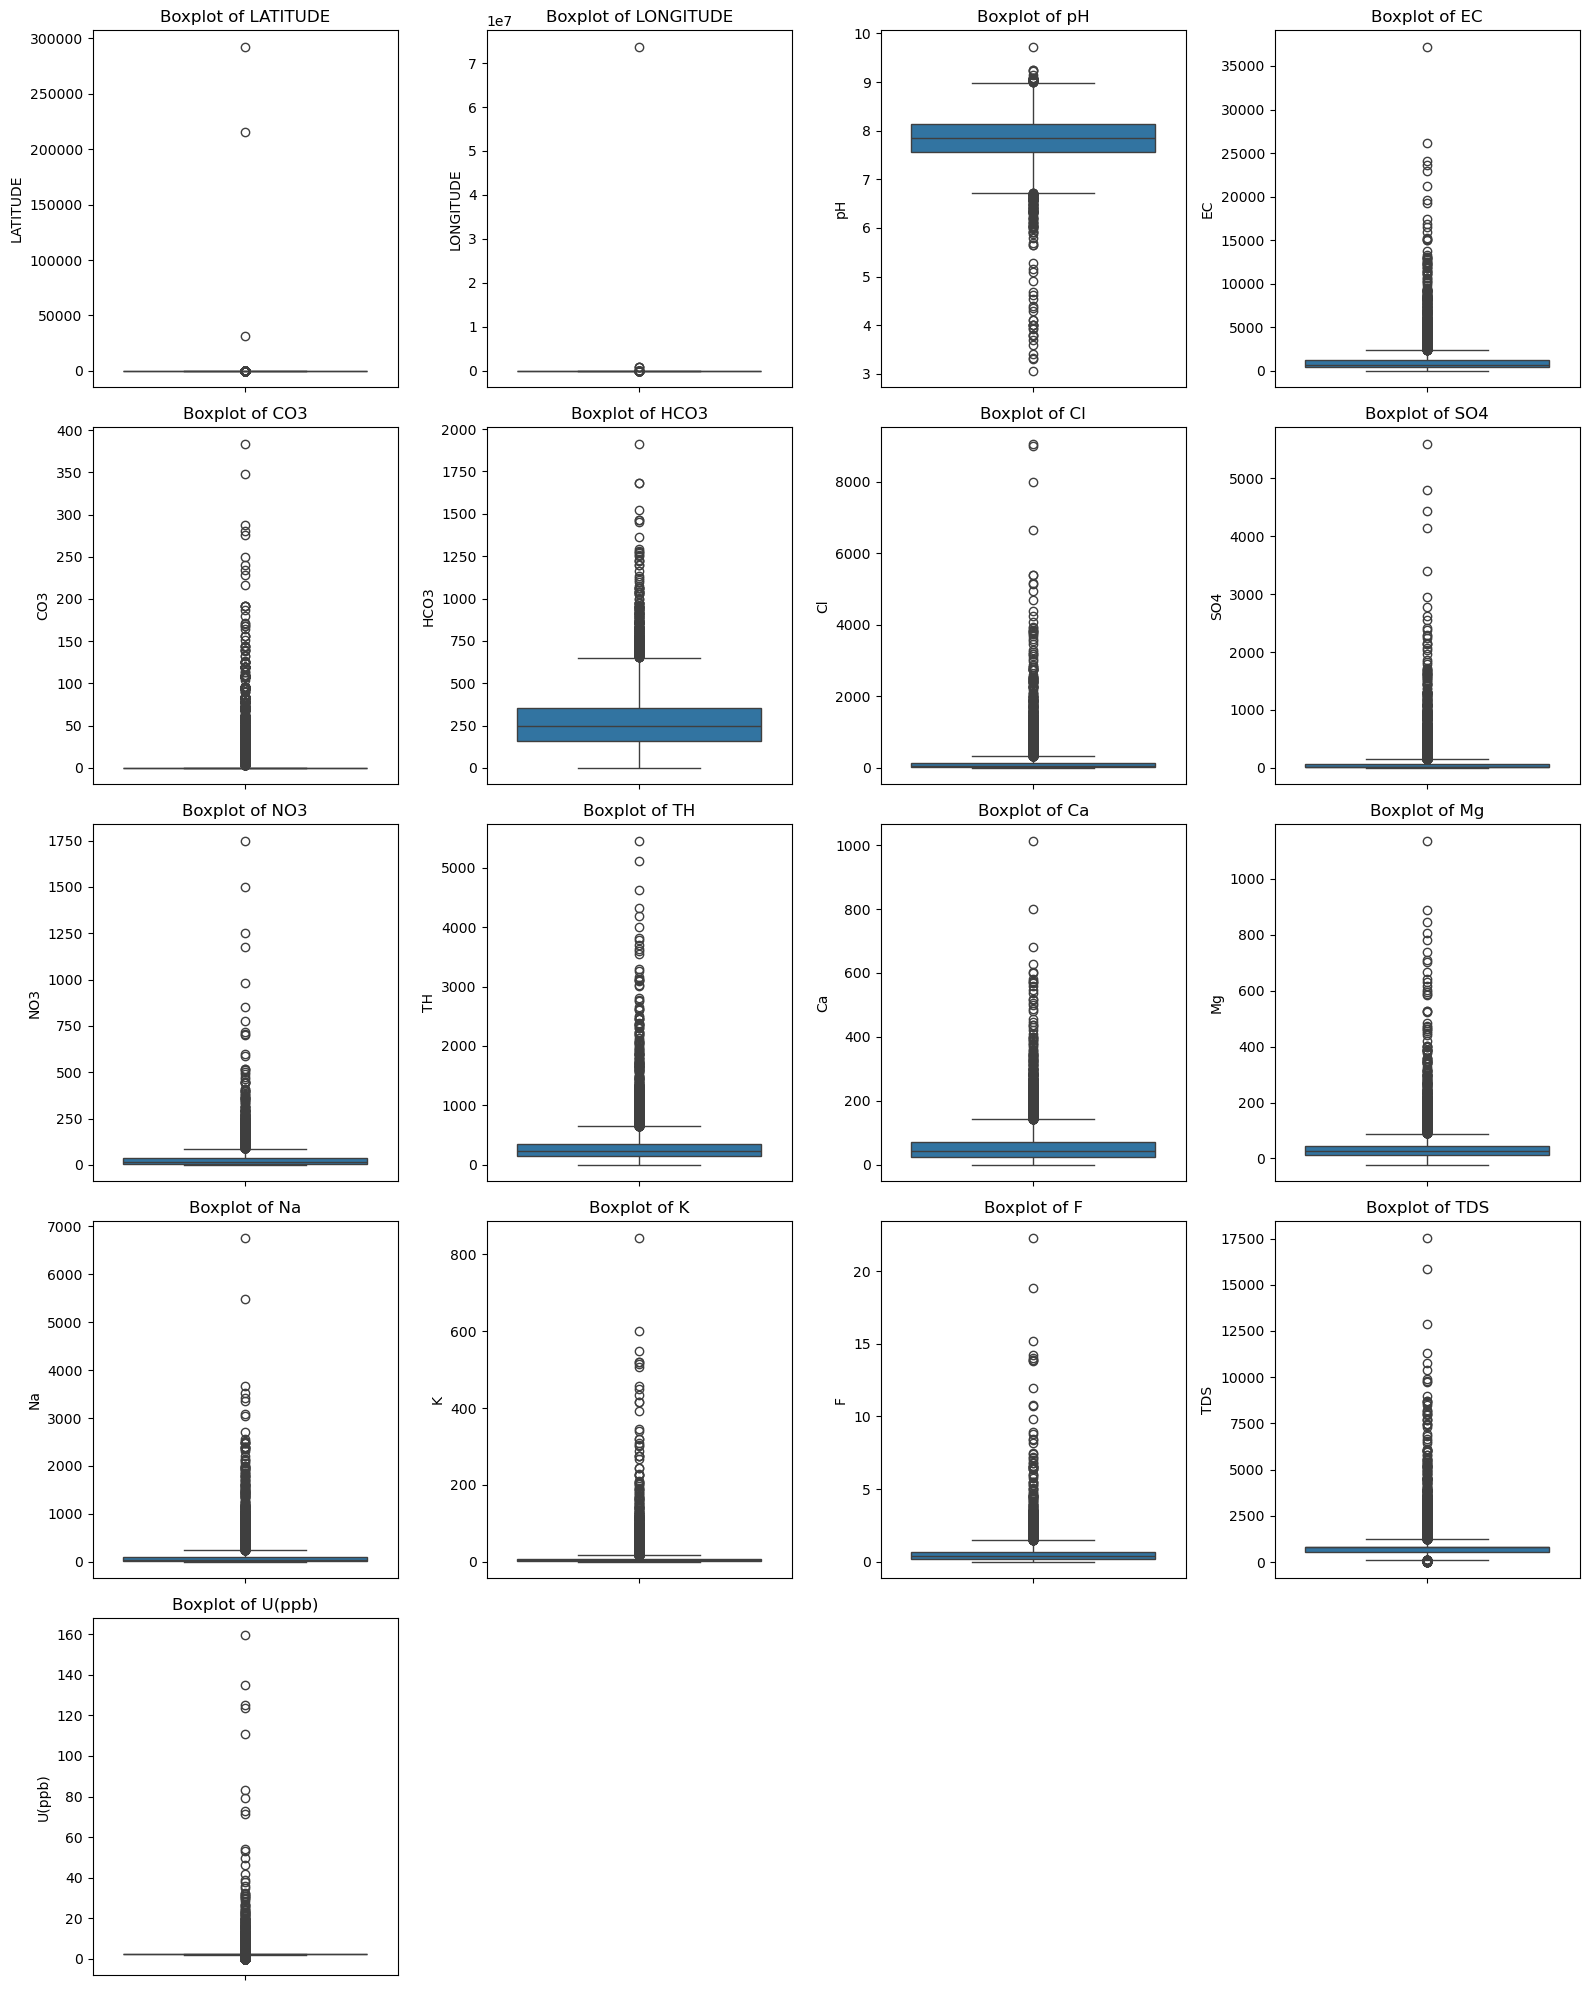

In [60]:
import seaborn as sns
plt.figure(figsize=(16,20))
for i,column in enumerate(numerical_columns):
    plt.subplot(5,4,i+1)

    sns.boxplot(y=data[column])
    plt.title(f"Boxplot of {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9058 entries, 0 to 9058
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATE      9058 non-null   object 
 1   DISTRICT   9058 non-null   object 
 2   LOCATION   9058 non-null   object 
 3   LATITUDE   9058 non-null   float64
 4   LONGITUDE  9058 non-null   float64
 5   pH         9058 non-null   float64
 6   EC         9058 non-null   float64
 7   CO3        9058 non-null   float64
 8   HCO3       9058 non-null   float64
 9   Cl         9058 non-null   float64
 10  SO4        9058 non-null   float64
 11  NO3        9058 non-null   float64
 12  TH         9058 non-null   float64
 13  Ca         9058 non-null   float64
 14  Mg         9058 non-null   float64
 15  Na         9058 non-null   float64
 16  K          9058 non-null   float64
 17  F          9058 non-null   float64
 18  TDS        9058 non-null   float64
 19  U(ppb)     9058 non-null   float64
dtypes: float64(17

In [64]:
from scipy import stats
for col in numerical_columns:
    z_scores=stats.zscore(data[col])
    outliers=(z_scores > 3) | (z_scores < -3)
print("Number of outliers in each column:\n",outliers.sum(axis=0))

Number of outliers in each column:
 83


In [66]:
from scipy import stats
for col in numerical_columns:
    z_scores = stats.zscore(data[col])
    data = data[(z_scores <= 3) & (z_scores >= -3)]

print("Outliers are removed and new shape:", data.shape)

print("Columns remaining after filtering:\n", data.dtypes)

Outliers are removed and new shape: (7085, 20)
Columns remaining after filtering:
 STATE         object
DISTRICT      object
LOCATION      object
LATITUDE     float64
LONGITUDE    float64
pH           float64
EC           float64
CO3          float64
HCO3         float64
Cl           float64
SO4          float64
NO3          float64
TH           float64
Ca           float64
Mg           float64
Na           float64
K            float64
F            float64
TDS          float64
U(ppb)       float64
dtype: object


In [68]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerics=scaler.fit_transform(data[numerical_columns])
numerics_df = pd.DataFrame(numerics, columns=numerical_columns)
numerics_df[:5]


,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,U(ppb)
0,0.045527,0.000086,0.479310,0.123234,0.0,0.241425,0.047985,0.003040,0.007194,0.253623,0.236111,0.405405,0.035211,0.000000,0.428571,0.145419,0.428571
1,0.046283,0.000086,0.406897,0.233051,0.0,0.345646,0.157390,0.015198,0.007194,0.362319,0.361111,0.468468,0.179577,0.020206,0.142857,0.274789,0.571429
2,0.046524,0.000086,0.396552,0.095339,0.0,0.153034,0.067179,0.003040,0.000000,0.181159,0.027778,0.459459,0.035211,0.020206,0.234694,0.104760,0.000000
3,0.047993,0.000086,0.431034,0.109816,0.0,0.209763,0.074856,0.006079,0.000000,0.195652,0.180556,0.360360,0.052817,0.040412,0.188776,0.139505,0.035714
4,0.045695,0.000086,0.468966,0.093220,0.0,0.201847,0.067179,0.003040,0.007194,0.188406,0.180556,0.351351,0.052817,0.000000,0.290816,0.132113,0.303571


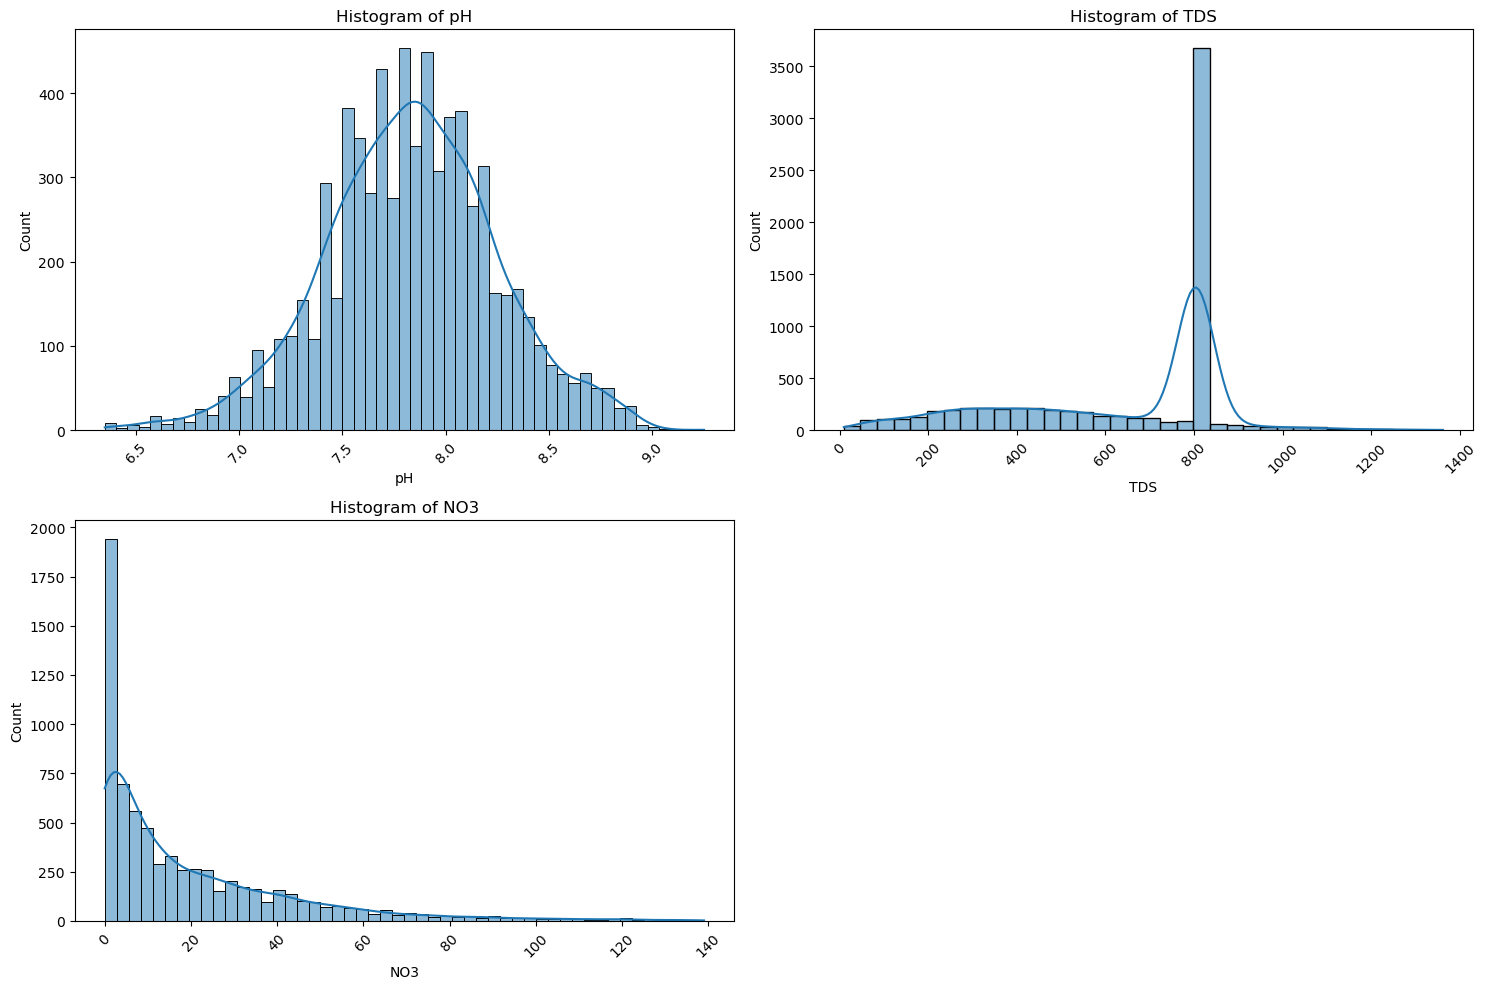

In [69]:
key_parameters=['pH','TDS','NO3']

plt.figure(figsize=(15,10))
for i, col in enumerate(key_parameters):
    plt.subplot(2,2,i+1)
    sns.histplot(data[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

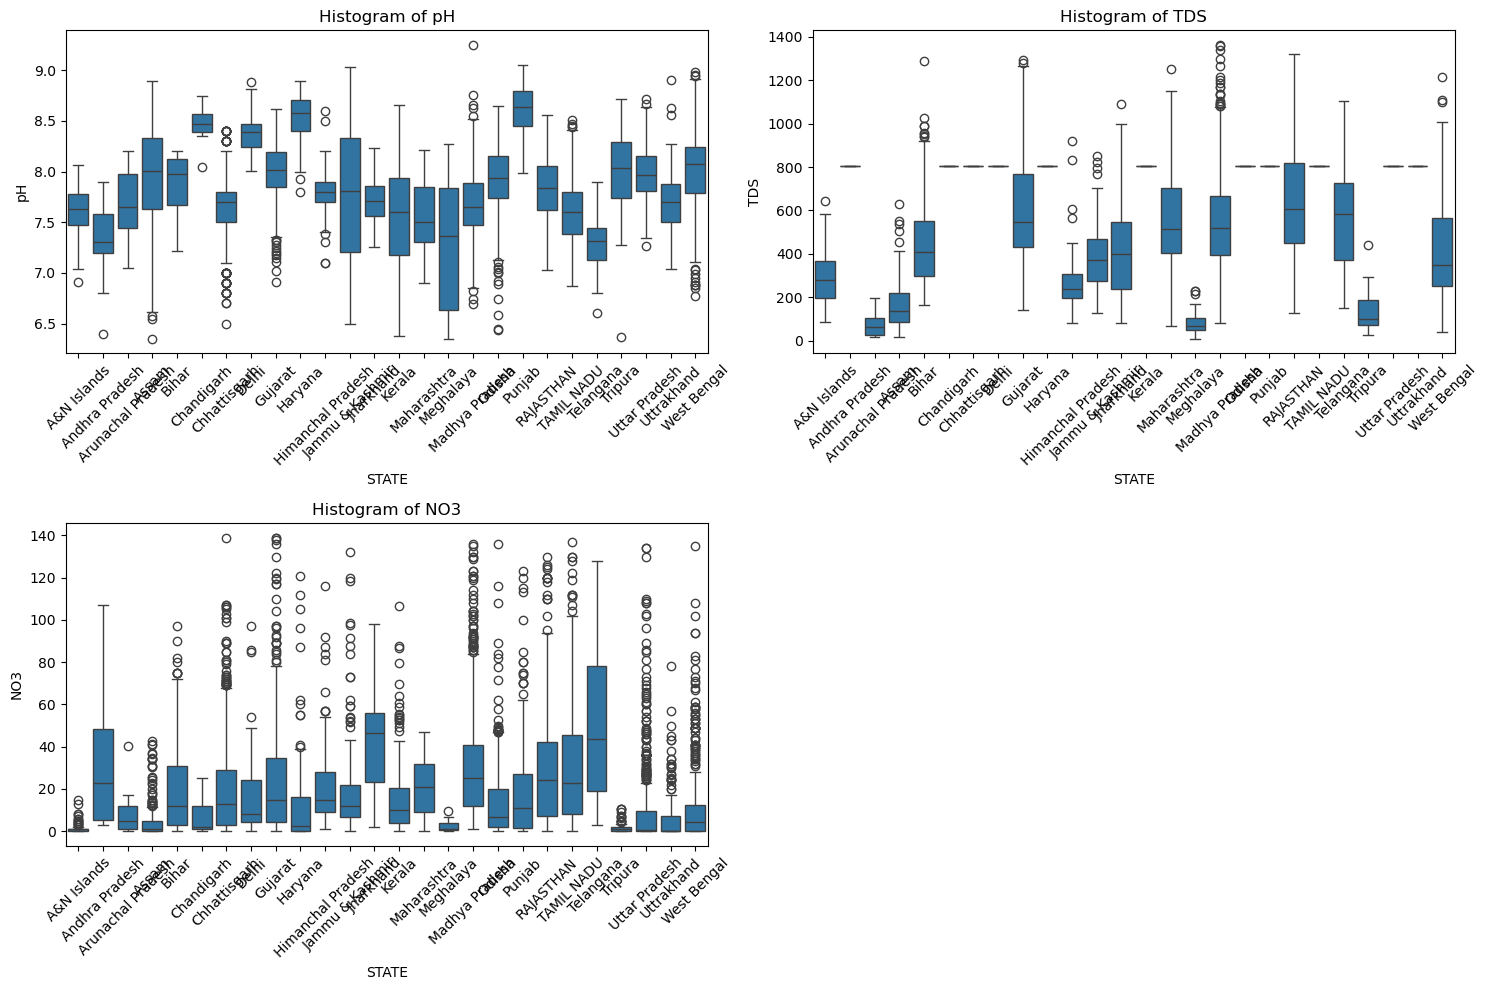

In [71]:
key_parameters=['pH','TDS','NO3']

plt.figure(figsize=(15,10))
for i, col in enumerate(key_parameters):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=data[col],x=data['STATE'])
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Analysis

In [73]:
data.columns

Index(['STATE', 'DISTRICT', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'pH', 'EC',
       'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F',
       'TDS', 'U(ppb)'],
      dtype='object')

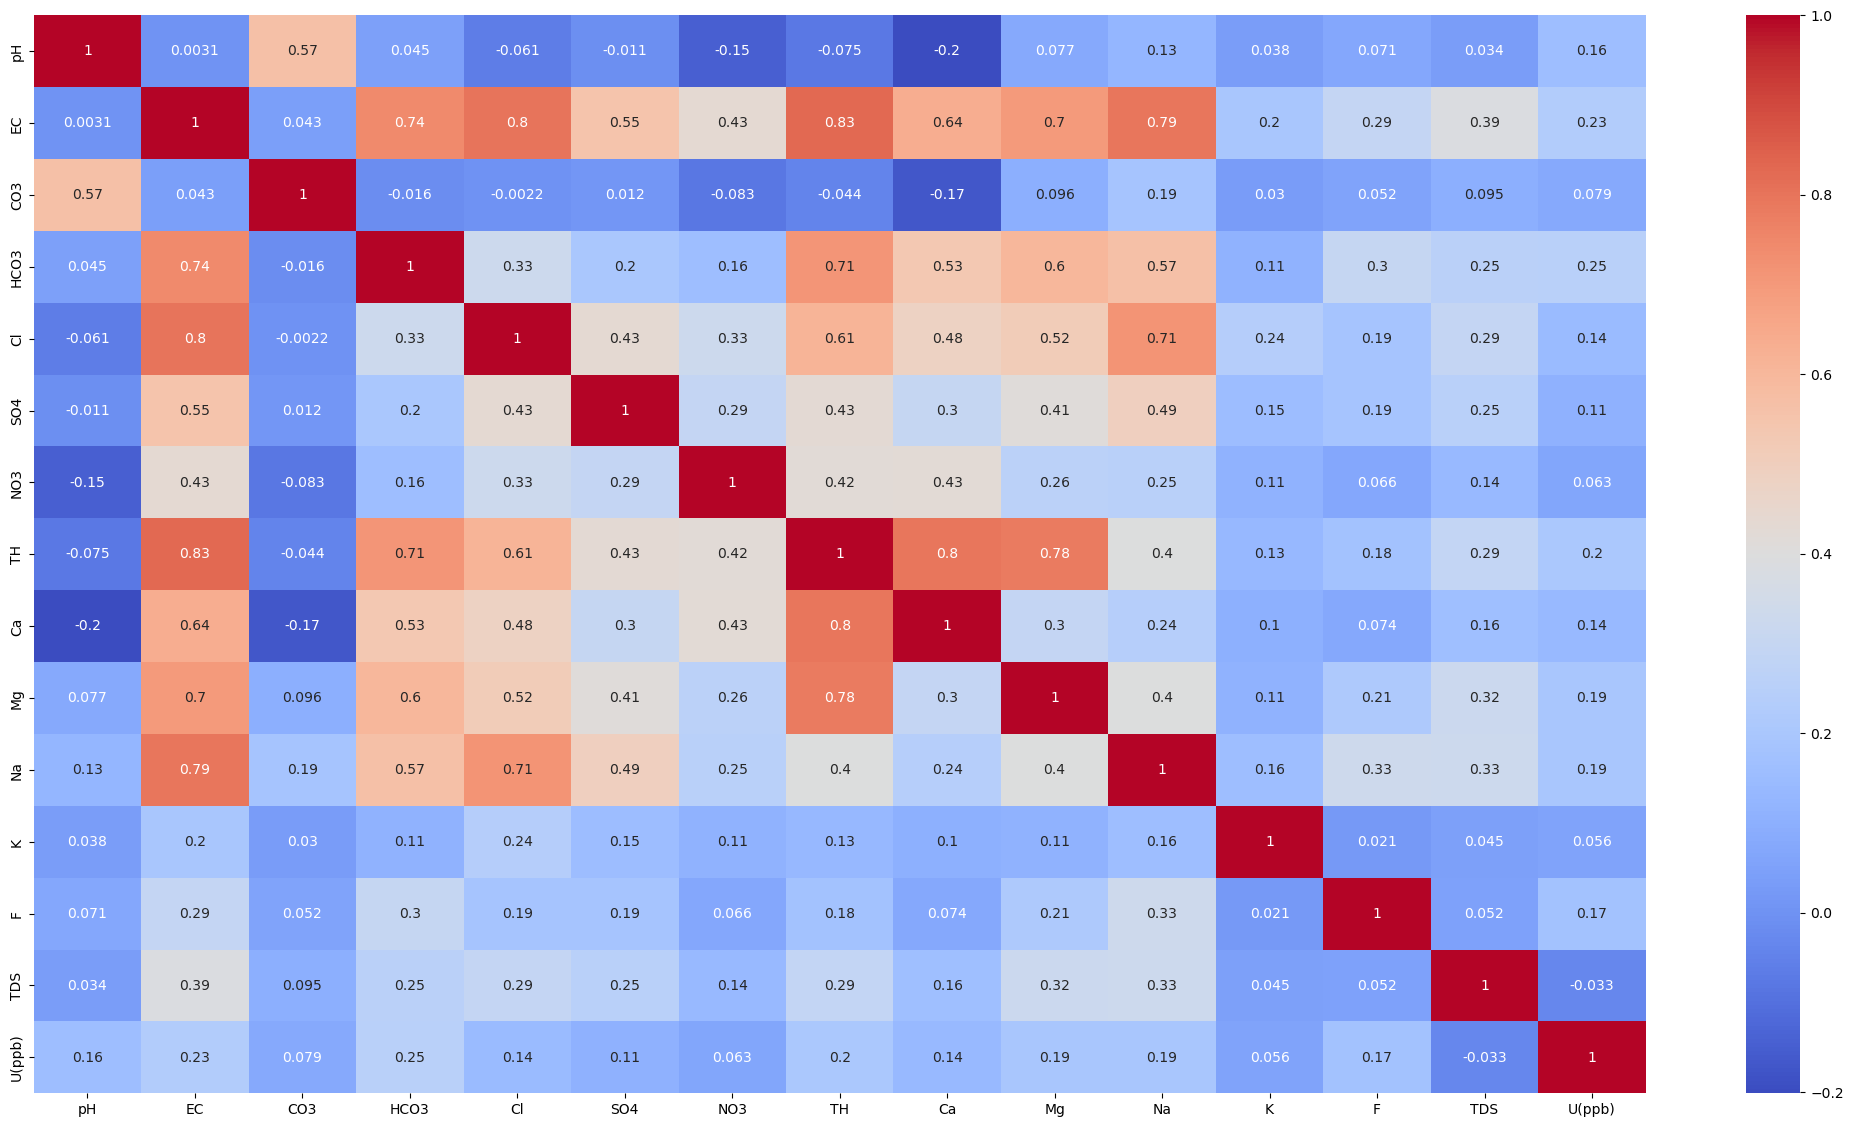

In [75]:
Quality_parameters=data[['pH', 'EC','CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F',
       'TDS', 'U(ppb)']]
corr_matrix=Quality_parameters.corr()
plt.figure(figsize=(26,14))
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)
plt.show()

## Creating new feature 'Water Hardness score' using Ca and Mg

In [77]:
data['Water_Hardness_Score']=(data['Ca'] * 2.497 + data['Mg'] * 4.118)
data.head()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,...,NO3,TH,Ca,Mg,Na,K,F,TDS,U(ppb),Water_Hardness_Score
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,...,1.0,175.0,34.0,22.0,10.0,0.0,0.84,206.0,4.8,175.494
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,...,1.0,250.0,52.0,29.0,51.0,1.0,0.28,381.0,6.4,249.266
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,...,0.0,125.0,4.0,28.0,10.0,1.0,0.46,151.0,0.0,125.292
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,...,0.0,135.0,26.0,17.0,15.0,2.0,0.37,198.0,0.4,134.928
5,A&N Islands,South Andaman,Burmanala,11.55778,92.72917,7.71,264.0,0.0,153.0,35.0,...,1.0,130.0,26.0,16.0,15.0,0.0,0.57,188.0,3.4,130.810


In [78]:
def classify_water_quality(row):
    if row['pH'] < 6.5 or row['pH'] > 8.5:
        return 'Unsafe'

    if row['TDS'] > 1000:
        tds_status='Unsafe'
    elif row['TDS'] >= 501:
        tds_status='Moderate'
    else:
        tds_status='Safe'

    if row['Water_Hardness_Score'] > 180:
        hardness_status='Unsafe'
    elif row['Water_Hardness_Score'] >= 121:
        hardness_status='Moderate'
    else:
        hardness_status='Safe'

    if tds_status == 'Unsafe' or hardness_status == 'Unsafe':
        return 'Unsafe'
    elif tds_status == 'Moderate' or hardness_status == 'Moderate':
        return 'Moderate'
    else:
        'Safe'

data['Water_Quality']=data.apply(classify_water_quality, axis=1)
print(data)    

            STATE           DISTRICT                  LOCATION  LATITUDE  \
0     A&N Islands      South Andaman                 Kodiaghat  11.54500   
1     A&N Islands      South Andaman                 Sippighat  11.60250   
2     A&N Islands      South Andaman                 Brichganj  11.62083   
3     A&N Islands      South Andaman             Wimberleyganj  11.73250   
5     A&N Islands      South Andaman                 Burmanala  11.55778   
...           ...                ...                       ...       ...   
9054  West Bengal  South 24 Parganas    Digambari (rudranagar)  21.70080   
9055  West Bengal  South 24 Parganas               Ganga Sagar  22.55580   
9056  West Bengal  South 24 Parganas  Kochuberia rc jetty ghat  21.85440   
9057  West Bengal  South 24 Parganas               Langalberia  22.38560   
9058  West Bengal  South 24 Parganas              Srirampur Tw  22.39310   

      LONGITUDE    pH      EC   CO3   HCO3     Cl  ...     TH    Ca    Mg  \
0      92.

In [81]:
data.head()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,...,TH,Ca,Mg,Na,K,F,TDS,U(ppb),Water_Hardness_Score,Water_Quality
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,...,175.0,34.0,22.0,10.0,0.0,0.84,206.0,4.8,175.494,Moderate
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,...,250.0,52.0,29.0,51.0,1.0,0.28,381.0,6.4,249.266,Unsafe
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,...,125.0,4.0,28.0,10.0,1.0,0.46,151.0,0.0,125.292,Moderate
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,...,135.0,26.0,17.0,15.0,2.0,0.37,198.0,0.4,134.928,Moderate
5,A&N Islands,South Andaman,Burmanala,11.55778,92.72917,7.71,264.0,0.0,153.0,35.0,...,130.0,26.0,16.0,15.0,0.0,0.57,188.0,3.4,130.810,Moderate


In [82]:
data['STATE']

0       A&N Islands
1       A&N Islands
2       A&N Islands
3       A&N Islands
5       A&N Islands
           ...     
9054    West Bengal
9055    West Bengal
9056    West Bengal
9057    West Bengal
9058    West Bengal
Name: STATE, Length: 7085, dtype: object

In [85]:
from sklearn.preprocessing import LabelEncoder
Lencoder=LabelEncoder()
data['STATE']=Lencoder.fit_transform(data['STATE'])
data.head()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,...,TH,Ca,Mg,Na,K,F,TDS,U(ppb),Water_Hardness_Score,Water_Quality
0,0,South Andaman,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,...,175.0,34.0,22.0,10.0,0.0,0.84,206.0,4.8,175.494,Moderate
1,0,South Andaman,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,...,250.0,52.0,29.0,51.0,1.0,0.28,381.0,6.4,249.266,Unsafe
2,0,South Andaman,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,...,125.0,4.0,28.0,10.0,1.0,0.46,151.0,0.0,125.292,Moderate
3,0,South Andaman,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,...,135.0,26.0,17.0,15.0,2.0,0.37,198.0,0.4,134.928,Moderate
5,0,South Andaman,Burmanala,11.55778,92.72917,7.71,264.0,0.0,153.0,35.0,...,130.0,26.0,16.0,15.0,0.0,0.57,188.0,3.4,130.810,Moderate


In [89]:
data['DISTRICT'].value_counts()

DISTRICT
Raigarh                  113
Bilaspur                  73
Jashpur                   65
South 24 Parganas         65
Korba                     63
                        ... 
JANJGIR CHAMPA             1
South West Garo Hills      1
Rajnangaon                 1
Bemetra                    1
Paschim Barddhaman         1
Name: count, Length: 473, dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder
Lencoder=LabelEncoder()
data['DISTRICT']=Lencoder.fit_transform(data['DISTRICT'])
data.head()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,...,TH,Ca,Mg,Na,K,F,TDS,U(ppb),Water_Hardness_Score,Water_Quality
0,0,420,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,...,175.0,34.0,22.0,10.0,0.0,0.84,206.0,4.8,175.494,Moderate
1,0,420,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,...,250.0,52.0,29.0,51.0,1.0,0.28,381.0,6.4,249.266,Unsafe
2,0,420,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,...,125.0,4.0,28.0,10.0,1.0,0.46,151.0,0.0,125.292,Moderate
3,0,420,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,...,135.0,26.0,17.0,15.0,2.0,0.37,198.0,0.4,134.928,Moderate
5,0,420,Burmanala,11.55778,92.72917,7.71,264.0,0.0,153.0,35.0,...,130.0,26.0,16.0,15.0,0.0,0.57,188.0,3.4,130.810,Moderate


In [94]:
from sklearn.preprocessing import LabelEncoder
Lencoder=LabelEncoder()
data['Water_Quality']=Lencoder.fit_transform(data['Water_Quality'])
data.head()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,...,TH,Ca,Mg,Na,K,F,TDS,U(ppb),Water_Hardness_Score,Water_Quality
0,0,420,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,...,175.0,34.0,22.0,10.0,0.0,0.84,206.0,4.8,175.494,0
1,0,420,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,...,250.0,52.0,29.0,51.0,1.0,0.28,381.0,6.4,249.266,1
2,0,420,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,...,125.0,4.0,28.0,10.0,1.0,0.46,151.0,0.0,125.292,0
3,0,420,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,...,135.0,26.0,17.0,15.0,2.0,0.37,198.0,0.4,134.928,0
5,0,420,Burmanala,11.55778,92.72917,7.71,264.0,0.0,153.0,35.0,...,130.0,26.0,16.0,15.0,0.0,0.57,188.0,3.4,130.810,0


## Modeling

### Using RandomForestClassifier

In [98]:
X = data[['pH', 'EC','CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F','TDS', 'U(ppb)']]
y = data['Water_Quality']

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [101]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [103]:
rf_accuracy=accuracy_score(y_test,y_predict)
print('Accuracy:',rf_accuracy)

rf_confusion_mat=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:')
print(rf_confusion_mat)

rf_classification_report=classification_report(y_test,y_predict)
print('Classification Report')
print(rf_classification_report)

Accuracy: 0.9858916478555305
Confusion Matrix:
[[ 539    2    0]
 [  17 1078    1]
 [   4    1  130]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       541
           1       1.00      0.98      0.99      1096
           2       0.99      0.96      0.98       135

    accuracy                           0.99      1772
   macro avg       0.98      0.98      0.98      1772
weighted avg       0.99      0.99      0.99      1772



### Trying with Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

lr_accuracy=accuracy_score(y_test,y_predict)
print('Accuracy:',lr_accuracy)

lr_confusion_mat=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:')
print(lr_confusion_mat)

lr_classification_report=classification_report(y_test,y_predict)
print('Classification Report')
print(lr_classification_report)

Accuracy: 0.9858916478555305
Confusion Matrix:
[[ 539    2    0]
 [  17 1078    1]
 [   4    1  130]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       541
           1       1.00      0.98      0.99      1096
           2       0.99      0.96      0.98       135

    accuracy                           0.99      1772
   macro avg       0.98      0.98      0.98      1772
weighted avg       0.99      0.99      0.99      1772



In [109]:
from sklearn import metrics
y_pred_proba=model.predict_proba(X_test)
auc=metrics.roc_auc_score(y_test,y_pred_proba,multi_class='ovr')
print('ROC-AUC score:'+str(auc))

ROC-AUC score:0.9593584953357053


In [111]:
# log loss
from sklearn.metrics import log_loss
y_pr=model.predict_proba(X_test)
logloss=log_loss(y_test,y_pr)
print('Logloss: %2f' % (logloss))


Logloss: 0.351797


# Saving the model

In [114]:
import joblib
joblib.dump(model,'water_quality_model.joblib')

['water_quality_model.joblib']

## Creating web dashboard using flask 

In [117]:
!pip install flask flask-ngrok

In [118]:
from flask import Flask, request, render_template_string
import joblib
import numpy as np

app = Flask(__name__)

model = joblib.load('water_quality_model.joblib')

HTML_TEMPLATE = '''
<!DOCTYPE html>
<html>
<head>
    <title>Water Quality Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f7f6;
            color: #333;
        }
        .container {
            max-width: 700px;
            margin: 30px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            text-align: center;
            color: #007BFF;
            margin-bottom: 20px;
        }
        form {
            display: flex;
            flex-wrap: wrap;
            justify-content: space-between;
        }
        label {
            width: 48%;
            margin-top: 10px;
            font-weight: bold;
        }
        input {
            width: 100%;
            padding: 8px;
            margin-top: 5px;
            border: 1px solid #ccc;
            border-radius: 5px;
            box-sizing: border-box;
        }
        button {
            width: 100%;
            padding: 12px;
            background-color: #007BFF;
            color: white;
            font-size: 16px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            margin-top: 20px;
        }
        button:hover {
            background-color: #0056b3;
        }
        .result {
            text-align: center;
            margin-top: 20px;
            font-size: 18px;
            color: #28a745;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Water Quality Prediction</h1>
        <form method="post" action="/predict">
            <label for="pH">pH:</label><input type="number" step="any" name="pH" required>
            <label for="EC">EC:</label><input type="number" step="any" name="EC" required>
            <label for="CO3">CO3:</label><input type="number" step="any" name="CO3" required>
            <label for="HCO3">HCO3:</label><input type="number" step="any" name="HCO3" required>
            <label for="Cl">Cl:</label><input type="number" step="any" name="Cl" required>
            <label for="SO4">SO4:</label><input type="number" step="any" name="SO4" required>
            <label for="TH">TH:</label><input type="number" step="any" name="TH" required>
            <label for="Ca">Ca:</label><input type="number" step="any" name="Ca" required>
            <label for="Mg">Mg:</label><input type="number" step="any" name="Mg" required>
            <label for="Na">Na:</label><input type="number" step="any" name="Na" required>
            <label for="K">K:</label><input type="number" step="any" name="K" required>
            <label for="F">F:</label><input type="number" step="any" name="F" required>
            <label for="TDS">TDS:</label><input type="number" step="any" name="TDS" required>
            <label for="U">U(ppb):</label><input type="number" step="any" name="U" required>
            <label for="Water_Hardness_Score">Water Hardness Score:</label>
            <input type="number" step="any" name="Water_Hardness_Score" required>
            <button type="submit">Predict Water Quality</button>
        </form>
        {% if prediction %}
            <div class="result">
                Predicted Water Quality: {{ prediction }}
            </div>
        {% endif %}
    </div>
</body>
</html>
'''

@app.route('/', methods=['GET'])
def index():
    return render_template_string(HTML_TEMPLATE)

@app.route('/predict', methods=['POST'])
def predict():
    try:
    
        features = [
            float(request.form['pH']),
            float(request.form['EC']),
            float(request.form['CO3']),
            float(request.form['HCO3']),
            float(request.form['Cl']),
            float(request.form['SO4']),
            float(request.form['TH']),
            float(request.form['Ca']),
            float(request.form['Mg']),
            float(request.form['Na']),
            float(request.form['K']),
            float(request.form['F']),
            float(request.form['TDS']),
            float(request.form['U']),
            float(request.form['Water_Hardness_Score'])
        ]
        

        input_features = np.array(features).reshape(1, -1)
        
        prediction = model.predict(input_features)
        
        return render_template_string(HTML_TEMPLATE, prediction=prediction[0])
    
    except Exception as e:
        return f"Error: {str(e)}"

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
